#Fourier Analysis

In [ ]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from matplotlib.ticker import MaxNLocator # to make integer ticks on x axis
from sympy import *
from sympy import series
from sympy import lambdify, Piecewise, fourier_series
from sympy.abc import x

### 1. Exponential form of Complex Numbers

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

1.a) $z = 0$ then 
$$
r = \sqrt{0^2 + 0^2} = \sqrt{0} = 0
$$
and 
$$
\theta = \arctan(0,0) = undefined, we\:consider\:it\:0
$$
so in $r.e^{i\theta}$ form,
$$
0 = 0.e^{0.i} = 0.1= 0
$$

----------------------------------------------------------------------------------------------------------------------------------
1.b) $z = 1$ then 
$$
r = \sqrt{1^2 + 0^2} = \sqrt{1} = 1
$$
and 
$$
\theta = \arctan(0,1) = 0
$$
so in $r.e^{i\theta}$ form,
$$
1 = 1.e^{0.i} = 1.1= 1
$$

----------------------------------------------------------------------------------------------------------------------------------
1.c) $z = -1$ then 
$$
r = \sqrt{-1^2 + 0^2} = \sqrt{1} = 1
$$
and 
$$
\theta = \arctan(0,-1) = \pi \:because\:direction\:is\:negative
$$
so in $r.e^{i\theta}$ form,
$$
-1 = 1.e^{\pi.i} = e^{i.\pi} = -1 (From Euler's formula)
$$

----------------------------------------------------------------------------------------------------------------------------------
1.d) $z = i$ then 
$$
r = \sqrt{0^2 + 1^2} = \sqrt{1} = 1
$$
and 
$$
\theta = \arctan(1,0) = \frac{\pi}{2}
$$
so in $r.e^{i\theta}$ form,
$$
i = 1.e^{\frac{\pi}{2}{i}} = e^{i.\frac{\pi}{2}} = i (From Euler's formula)
$$

----------------------------------------------------------------------------------------------------------------------------------
1.e) $z = 1-2i$ then 
$$
r = \sqrt{1^2 + (-2)^2} = \sqrt{1+4} = \sqrt{5}
$$
and 
$$
\theta = \arctan(-2,1) = -arctan(2) = -63.435 deg\:or\:-1.107 rad
$$
so in $r.e^{i\theta}$ form,
$$
1-2i = \sqrt{5}.e^{-i.tan^{-1}(2)}
$$

----------------------------------------------------------------------------------------------------------------------------------
1.f) $z = -8+7i$ then 
$$
r = \sqrt{(-8)^2 + 7^2} = \sqrt{64+49} = \sqrt{113}
$$
and 
$$
\theta = \arctan(7,-8) = \pi-arctan(7/8) = 180-41.186 deg\:or 3.14-0.718 rad = 138.814 deg \:or\:2.422 rad
$$
so in $r.e^{i\theta}$ form,
$$
-8+7i = \sqrt{113}.e^{i(\pi-tan^{-1}(\frac{7}{8}))}
$$

In [ ]:
#1.a)
z_a = 0
r_a = np.abs(z_a)
theta_a = np.arctan2(np.imag(z_a),np.real(z_a))
p_a = r_a * np.exp(1j*theta_a)
print('1.a)', 'r:', r_a,',theta:', theta_a, ',Polar form:', p_a)

#1.b)
z_b = 1
r_b = np.abs(z_b)
theta_b = np.arctan2(np.imag(z_b),np.real(z_b))
p_b = r_b * np.exp(1j*theta_b)
print('1.b)', 'r:', r_b,',theta:', theta_b, ',Polar form:', p_b)

#1.c)
z_c = -1
r_c = np.abs(z_c)
theta_c = np.arctan2(np.imag(z_c),np.real(z_c))
p_c = r_c * np.exp(1j*theta_c)
print('1.c)', 'r:', r_c,',theta:', theta_c, ',Polar form:', p_c)

#1.d)
z_d = 1j
r_d = np.abs(z_d)
theta_d = np.arctan2(np.imag(z_d),np.real(z_d))
p_d = r_d * np.exp(1j*theta_d)
print('1.d)', 'r:', r_d,',theta:', theta_d, ',Polar form:', p_d)

#1.e)
z_e = 1-2j
r_e = np.abs(z_e)
theta_e = np.arctan2(np.imag(z_e),np.real(z_e))
p_e = r_e * np.exp(1j*theta_e)
print('1.e)', 'r:', r_e,',theta:', theta_e, ',Polar form:', p_e)

#1.f)
z_f = -8+7j
r_f = np.abs(z_f)
theta_f = np.arctan2(np.imag(z_f),np.real(z_f))
p_f = r_f * np.exp(1j*theta_f)
print('1.f)', 'r:', r_f,',theta:', theta_f, ',Polar form:', p_f)

1.a) r: 0 ,theta: 0.0 ,Polar form: 0j
1.b) r: 1 ,theta: 0.0 ,Polar form: (1+0j)
1.c) r: 1 ,theta: 3.141592653589793 ,Polar form: (-1+1.2246467991473532e-16j)
1.d) r: 1.0 ,theta: 1.5707963267948966 ,Polar form: (6.123233995736766e-17+1j)
1.e) r: 2.23606797749979 ,theta: -1.1071487177940904 ,Polar form: (1.0000000000000002-2j)
1.f) r: 10.63014581273465 ,theta: 2.4227626539681686 ,Polar form: (-7.999999999999999+7.000000000000001j)


### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

2.a) Using Euler's formula: $e^{i \theta} = \cos \theta + i \sin \theta$

We can say that,

$e^{(\alpha+\beta)i}=cos(\alpha+\beta)+isin(\alpha+\beta)$-----(1)

b) Also, $e^{(\alpha+\beta)i}$ can be expressed as $e^{i\alpha}.e^{i\beta}$----(2)

From Euler's formula, $e^{i\alpha}= \cos \alpha + i \sin \alpha$

and, $e^{i\beta}= \cos \beta + i \sin \beta$

So, their product $e^{i\alpha}.e^{i\beta}$= $(\cos \alpha + i \sin \alpha)$$(\cos \beta + i \sin \beta)$= $(\cos \alpha.\cos \beta+ i \cos \alpha.\sin \beta+i \cos \beta.\sin \alpha + i^2 \sin \alpha\sin \beta)$

$e^{i\alpha}.e^{i\beta}$= $(\cos \alpha.\cos \beta- \sin \alpha\sin \beta)+i( \cos \alpha.\sin \beta+ \cos \beta.\sin \alpha )$-----(3)

c) From eqns. (1), (2) and (3), we have,

$cos(\alpha+\beta)+isin(\alpha+\beta)$= $(\cos \alpha.\cos \beta- \sin \alpha\sin \beta)+i( \cos \alpha.\sin \beta+ \cos \beta.\sin \alpha )$----(4)
Thus, by seperating the real and imaginary parts from eqn. (4), we have,
$$cos(\alpha+\beta)= (\cos \alpha.\cos \beta- \sin \alpha\sin \beta)$$
$$sin(\alpha+\beta)= ( \cos \alpha.\sin \beta+ \cos \beta.\sin \alpha )$$



### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

In [ ]:
t = sm.symbols("t", real=True)
n = sm.symbols("n", integer=True, positive=True)
q = 2*sm.pi*sm.I*n*t
p = 2*sm.pi*n*t
T = sm.Rational(1,2)

fn = sm.integrate(sm.cos(p)*sm.exp(q),(t,-T/2,T/2)) #cos is positive from -pi/2 to pi/2
display("Expression:", fn)
fn = sm.simplify(fn)
display("Simplified Expresion:",fn)

'Expression:'

       ⅈ⋅π⋅n      -ⅈ⋅π⋅n
1   ⅈ⋅ℯ        ⅈ⋅ℯ      
─ - ──────── + ─────────
4    8⋅π⋅n       8⋅π⋅n  

'Simplified Expresion:'

1/4

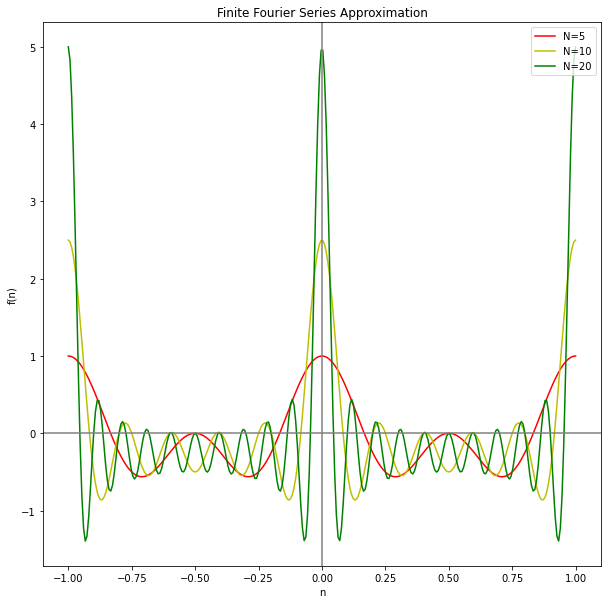

In [ ]:
N1 = range(-2,3)
N2 = range(-5,6)
N3 = range(-10,11)
terms_N1 = [0 if k == 0 else fn.subs(n,k)*sm.exp(-2*sm.pi*sm.I*k*t) for k in N1]
terms_N2 = [0 if k == 0 else fn.subs(n,k)*sm.exp(-2*sm.pi*sm.I*k*t) for k in N2]
terms_N3 = [0 if k == 0 else fn.subs(n,k)*sm.exp(-2*sm.pi*sm.I*k*t) for k in N3]

fapprox_N1 = sum(terms_N1)
fapprox_N2 = sum(terms_N2)
fapprox_N3 = sum(terms_N3)

#Plotting
line1, line2, line3 = sm.plot(fapprox_N1, fapprox_N2, fapprox_N3, (t,-1,1), show=False)
x1, y1 = line1.get_points()
x2, y2 = line2.get_points()
x3, y3 = line3.get_points()
fig = plt.figure(figsize = (10,10))
plt.plot(x1, y1, color='r', label='N=5')
plt.plot(x2, y2, color='y', label='N=10')
plt.plot(x3, y3, color='g', label='N=20')
plt.title("Finite Fourier Series Approximation")
plt.xlabel('n')
plt.ylabel('f(n)')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.legend();
plt.show()

### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

4) Let $f(t)=cos(2\pi t)$

Representing $f(t)$ using Euler's representation-

$cos(2\pi t) =\frac{e^{2\pi it}+e^{-2\pi it}}{2}$-----(1)

And, let $g(t)=sin(2\pi t)$

Representing $g(t)$ using Euler's representation-

$sin(2\pi t) =\frac{e^{2\pi it}-e^{-2\pi it}}{2i}$-----(2)

Now, the inner product or dot product of the 2 functions is-

$=\int_0^1 f(t)\overline{g(t)} dt$

From eqn (1) and (2), we get,

$=\int_0^1 \frac{e^{2\pi it}+e^{-2\pi it}}{2}.\int_0^1 \overline{\frac{e^{2\pi it}-e^{-2\pi it}}{2i}}$

$=\int_0^1 \frac{e^{2\pi it}+e^{-2\pi it}}{2}.\int_0^1 \frac{e^{-2\pi it}-e^{2\pi it}}{2i}$

$=\frac{1}{4i}\int_0^1 (e^{2\pi it}+e^{-2\pi it}).(e^{-2\pi it}-e^{2\pi it})$

$=\frac{-1}{4i}\int_0^1 (e^{2\pi it}+e^{-2\pi it}).(e^{2\pi it}-e^{-2\pi it})$

Now, as we know that $(a+b)(a-b)=(a^2-b^2)$ So the above eqn can be simplified as,

$=\frac{-1}{4i}\int_0^1 (e^{4\pi it}-e^{-4\pi it})$ 

Now, again from Euler's representation,

$=\frac{-1}{4i}\int_0^1 2i.sin(4\pi t)$ 

$=\frac{-2i}{4i}\int_0^1 sin(4\pi t)$

$=\frac{-1}{2}\frac{-cos(4\pi t)}{4 \pi}|_0^1$

$=\frac{1}{8 \pi}(cos 4\pi-cos 0)$

$=\frac{1}{8 \pi}(1-1)=0$

Hence, we can conclude as the inner or dot product of $\cos(2\pi t)$ and $\sin(2 \pi t)$ is 0, they both are Orthogonal to each other.


### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`. 
Make sure to simplify, these shouldn't give complicated results. 

Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{ 
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

Function 1:


⎧1  for t ≥ 0
⎨            
⎩0  otherwise

Fourier series of Function 1:


2⋅sin(π⋅t)   1
────────── + ─
    π        2

Function 2:


  1   
──────
 2    
t  + 1

Fourier series of Function 2:


         1                 
         ⌠                 
         ⎮  cos(π⋅t)      π
cos(π⋅t)⋅⎮  ──────── dt + ─
         ⎮    2           4
         ⎮   t  + 1        
         ⌡                 
         -1                

Function 3:


     2
 -π⋅t 
ℯ     

Fourier series of Function 3:


         1                              
         ⌠                              
         ⎮       2                      
         ⎮   -π⋅t                erf(√π)
cos(π⋅t)⋅⎮  ℯ     ⋅cos(π⋅t) dt + ───────
         ⌡                          2   
         -1                             

Text(0, 0.5, '$f(s)$')

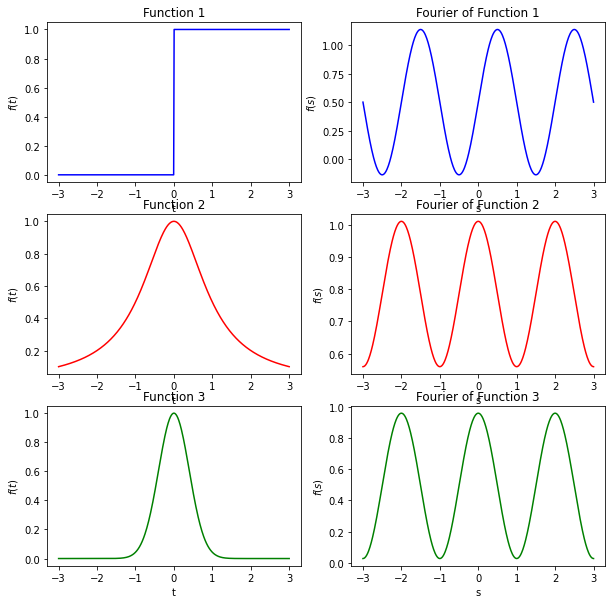

In [ ]:
n = 2
#First given function 
a = Piecewise((1, t >= 0), (0, t < 0), (0, True))
fn1 = lambdify(t, a)                       
print('Function 1:')
display(a)
s = fourier_series(a, (t, -1, 1))
print('Fourier series of Function 1:')
s = s.truncate(n=n)                       
display(s.trigsimp())
exp1 = lambdify(t,s.trigsimp())

#Second given function 
b = 1/(1+t**2)
fn2 = lambdify(t,b)
print('Function 2:')
display(b)
s2 = fourier_series(b, (t, -1, 1))
print('Fourier series of Function 2:')
s2 = s2.truncate(n=n)
display(s2.simplify())
exp2 = lambdify(t,s2)

#Third given function 
c = sm.exp(-sm.pi*(t**2))
fn3 = lambdify(t,c)
print('Function 3:')
display(c)
s3 = fourier_series(c, (t, -1, 1))
print('Fourier series of Function 3:')
s3 = s3.truncate(n=n)     
display(s3.simplify())
exp3 = lambdify(t,s3)

#Plotting parameters
fig = plt.figure(figsize =(10,10))
x = np.linspace(-3,3, 500)

fig.add_subplot(3,2,1)
plt.plot(x, fn1(x), 'b')
plt.title('Function 1')
plt.xlabel('t')
plt.ylabel('$f(t)$')

fig.add_subplot(3,2,2)
plt.plot(x, exp1(x), 'b')
plt.title('Fourier of Function 1')
plt.xlabel('s')
plt.ylabel('$f(s)$')

fig.add_subplot(3,2,3)
plt.plot(x, fn2(x), 'r')
plt.title('Function 2')
plt.xlabel('t')
plt.ylabel('$f(t)$')

fig.add_subplot(3,2,4)
plt.plot(x, exp2(x), 'r')
plt.title('Fourier of Function 2')
plt.xlabel('s')
plt.ylabel('$f(s)$')

fig.add_subplot(3,2,5)
plt.plot(x, fn3(x), 'g')
plt.title('Function 3')
plt.xlabel('t')
plt.ylabel('$f(t)$')

fig.add_subplot(3,2,6)
plt.plot(x, exp3(x), 'g')
plt.title('Fourier of Function 3')
plt.xlabel('s')
plt.ylabel('$f(s)$')

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{eqnarray}
\dot x & = & -y \\
\dot y & = & -x + u
\end{eqnarray}

a) First take the Fourier Transform of both equations. 

b) Solve for $Y(s)$ in terms of $U(s)$. 

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function. 

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$. 

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$. 

6.a) Given eqns are: 
$\dot x  =  -y$ and $\dot y  =  -x + u$
Taking the Fourier Transform of both equations we get-

$ 2\pi i sX(s) = -Y(s) ---(1)$

$ 2\pi i sY(s) = -X(s) + U(s) ---(2)$

b) From eqn (1), we have 

$ X(s) = \frac{-Y(s)}{2\pi i s}$ and substituting this in eqn (2),

$ 2\pi i sY(s) = \frac{Y(s)}{2\pi i s} + U(s) $

$ 2\pi i sY(s) - \frac{Y(s)}{2\pi i s}=   U(s) $

$ Y(s)  (2\pi i s - \frac{1}{2\pi i s}) =   U(s) $

$ Y(s) =  (2\pi i s - \frac{1}{2\pi i s})^{-1} * U(s) ----(3)$

$ Y(s) =  F(s) * U(s)$ where $F(s)=(2\pi i s - \frac{1}{2\pi i s})^{-1}$

c) Inverse fourier transform of the function $F(s)$ obtained in eqn (3), 

$\mathcal{F}^{-1}F(s)= f(t) = \int_{-\infty}^{\infty} (2\pi i s - \frac{1}{2\pi i s})^{-1} e^{i2πst}ds $

$= \int_{-\infty}^{\infty} {\frac{2\pi i s} {(2\pi i s)^2 - 1}} e^{i2πst}ds $

$= \int_{-\infty}^{\infty} { \frac{2\pi i s} {(2\pi i s + 1) (2\pi i s - 1)}} e^{i2πst}ds $

$= \int_{-\infty}^{\infty} {\frac{ 2\pi i s} {2} \left(\frac{1} {(2\pi i s - 1)} - \frac{1}{(2\pi i s + 1)}\right)} e^{ i 2πst}ds $

$= \int_{-\infty}^{\infty} {\frac{ 2\pi i s} {2} \left(\frac{1} {(2\pi i s - 1)}\right)e^{ i 2πst}ds - \int_{-\infty}^{\infty} \frac{ 2\pi i s} {2} \left(\frac{1}{(2\pi i s + 1)}\right)} e^{i2πst}ds $

$f(t)=\frac{e^{\frac{-t}{2\pi}}\theta (t)}{2\sqrt{2\pi}}+\frac{e^{\frac{t}{2\pi}}\theta (-t)}{2\sqrt{2\pi}}$

d) Using convolution,

$y(t)= f(t)*u(t)$

$y(t)= (\frac{e^{\frac{-t}{2\pi}}\theta (t)}{2\sqrt{2\pi}}+\frac{e^{\frac{t}{2\pi}}\theta (-t)}{2\sqrt{2\pi}})u(t)$

e)From (b) we have-

$ X(s) = \frac{-Y(s)}{2\pi i s}$

Now, taking the inverse Fourier transform of the above eqn we get,

$\mathcal{F}^{-1}X(s)=x(t)=g(t)*y(t)$

where, $g(t)= \mathcal{F}^{-1}(\frac{-1}{2\pi i s})=-\frac{sgn(t)}{4\pi}$

Therefore, $x(t)=-\frac{sgn(t)}{4\pi}y(t)$



### 7.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`. 

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it. 

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

(<matplotlib.image.AxesImage at 0x7f3487dc7f90>,
 Text(0.5, 1.0, 'Normalized Image'))

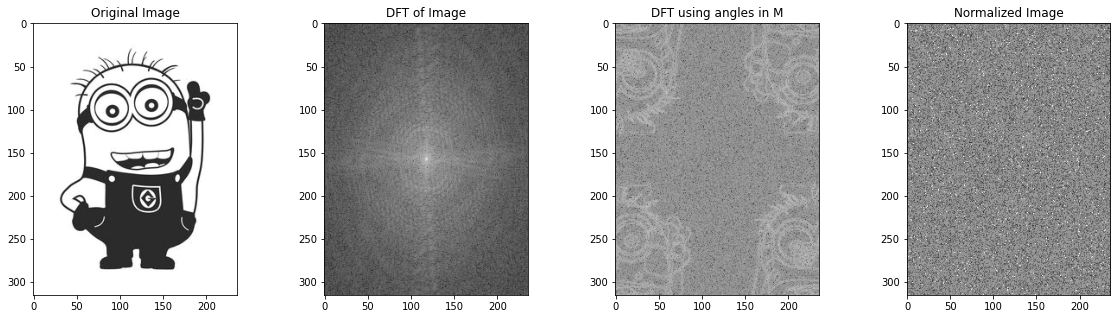

In [ ]:
#a)
import imageio
m = imageio.imread('sample_data/Minion.jpg', as_gray=True)

#b) DFT
M = np.fft.fft2(m)
M = np.fft.fftshift(M) # Shift it so the low frequencies are in the middle
M_new = 20*np.log(np.abs(M)) 

#c) Setting M_new to the angles of entries in M and IFT
M_new_M = 20*np.abs(np.angle(M, deg = True))   
M_new_M = np.fft.fft2(M_new_M)
M_new_M = np.fft.fftshift(M_new_M) # Shift it so the low frequencies are in the middle
M_new_M = 20*np.log(np.abs(M_new_M))

#d) Normalize to magnitude 1 and IFT
norm_M = M/abs(M)
M_norm = np.fft.fft2(norm_M)
M_norm= np.fft.fftshift(norm_M) # Shift it so the low frequencies are in the middle
M_norm = 20*np.log(np.abs(M_norm))

#Plotting
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].imshow(m, cmap = 'gray'),ax[0].set_title('Original Image')                
ax[1].imshow(M_new, cmap = 'gray'),ax[1].set_title('DFT of Image')   
ax[2].imshow(M_new_M, cmap = 'gray'),ax[2].set_title('DFT using angles in M')   
ax[3].imshow(M_norm, cmap = 'gray'),ax[3].set_title('Normalized Image')      